In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import scipy.stats as stats
import distribution as dist


In [31]:
immunizations = pd.read_csv("Immunization.csv")
immunizations.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Percentage of Immunizations,Flag Codes,Flags
0,ACATHEPB,Immunisation: Hepatitis B,ENFANTTX,% of children immunised,AUS,Australia,2010,2010,91.6,NaN,NaN
1,ACATHEPB,Immunisation: Hepatitis B,ENFANTTX,% of children immunised,AUS,Australia,2011,2011,91.6,NaN,NaN
2,ACATHEPB,Immunisation: Hepatitis B,ENFANTTX,% of children immunised,AUS,Australia,2012,2012,91.8,NaN,NaN
3,ACATHEPB,Immunisation: Hepatitis B,ENFANTTX,% of children immunised,AUS,Australia,2013,2013,91.0,NaN,NaN
4,ACATHEPB,Immunisation: Hepatitis B,ENFANTTX,% of children immunised,AUS,Australia,2014,2014,91.2,NaN,NaN


In [32]:
importantData = immunizations[["Country", "Year", "Percentage of Immunizations"]]
importantData.head()

,Country,Year,Percentage of Immunizations
0,Australia,2010,91.6
1,Australia,2011,91.6
2,Australia,2012,91.8
3,Australia,2013,91.0
4,Australia,2014,91.2


Percentage of Immunizations
Mean: 84.39279523293607
Std: 21.568353990572735



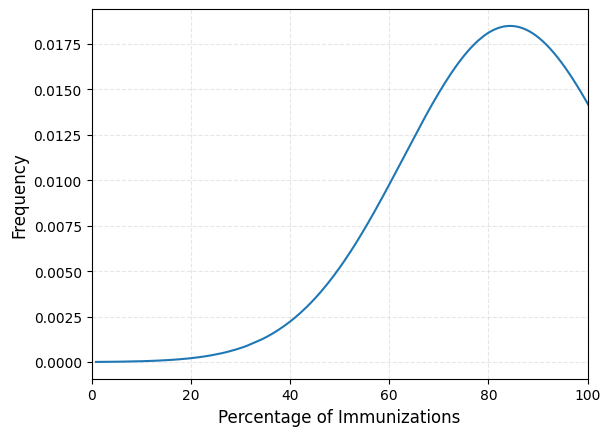

/Users/jonathan/Documents/Coding Projects/BeastCancerDS/distribution.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())


,Country,Year,Percentage of Immunizations,Immunizations Scaled Values
0,Australia,2010,91.6,0.892717
1,Australia,2011,91.6,0.892717
2,Australia,2012,91.8,0.894685
3,Australia,2013,91.0,0.886811
4,Australia,2014,91.2,0.888780


In [33]:
xCol = "Percentage of Immunizations"
valueMean, valueStd = dist.dist_info(importantData, xCol)
dist.dist_plot(importantData, xCol, valueMean, valueStd, 0, 100)
importantData = dist.add_norm(importantData, xCol, "Immunizations Scaled Values")
importantData.head()